## K-means

In [34]:
import seaborn as sns
df = sns.load_dataset('iris')

In [35]:
X = df.drop(columns=['species'])

In [36]:
# 標準化
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)

# k-means
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X)

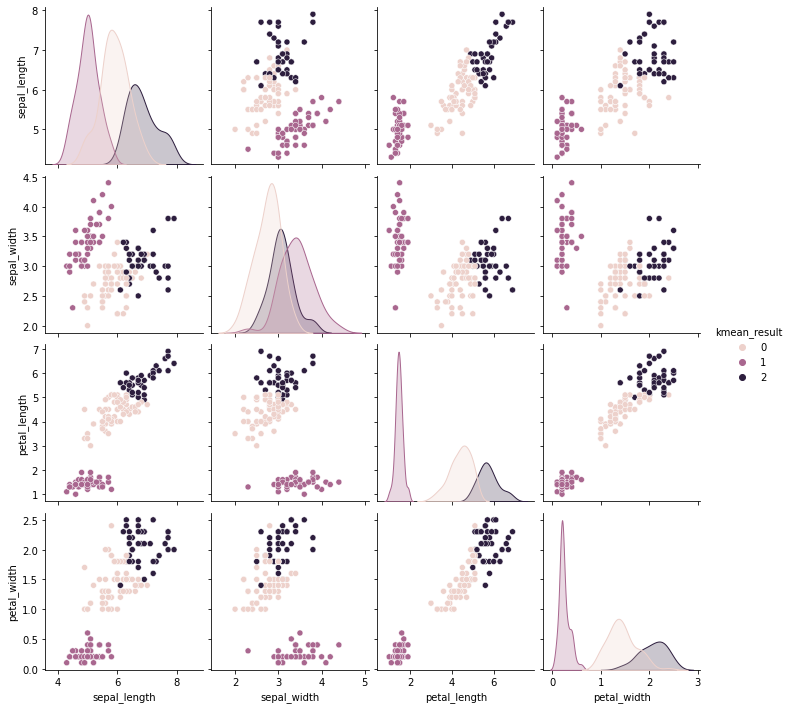

In [37]:
#データの可視化
import pandas as pd

result_df = pd.concat([X, pd.DataFrame(labels, columns=['kmean_result'])], axis=1)
sns.pairplot(result_df, hue='kmean_result')

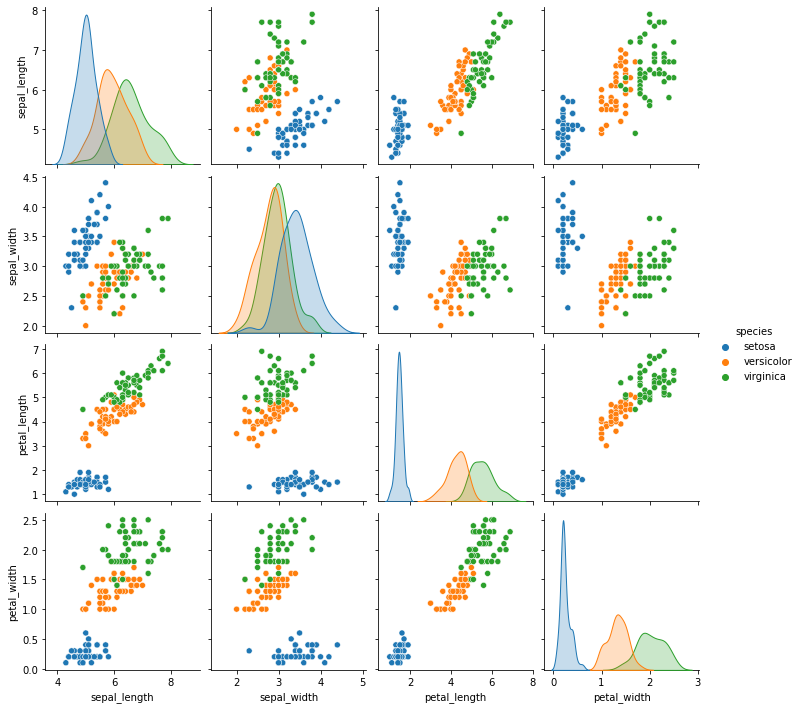

In [38]:
sns.pairplot(df, hue='species')

In [39]:
losses = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    losses.append(-kmeans.score(X))

In [40]:
losses

[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.228473214285714,
 46.47223015873016,
 39.03998724608725,
 34.299712121212124,
 30.063110617452722,
 28.27172172856384]

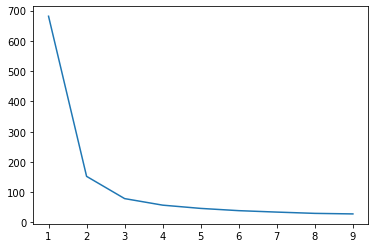

In [41]:
import matplotlib.pyplot as plt
plt.plot(range(1, 10), losses)

## 階層クラスタリング

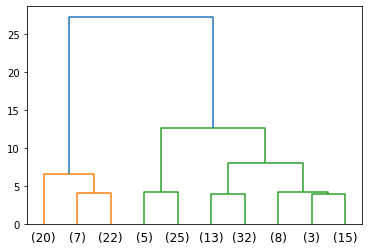

In [48]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

Z = linkage(X_scaled, method='ward')
# [クラスター要素1, クラスター要素2, 距離, データ数]の配列が返却される

d = dendrogram(Z, truncate_mode='lastp', p=10)

 ## クラスタの分布描画

In [56]:
clusters = fcluster(Z, criterion='maxclust', t=3)

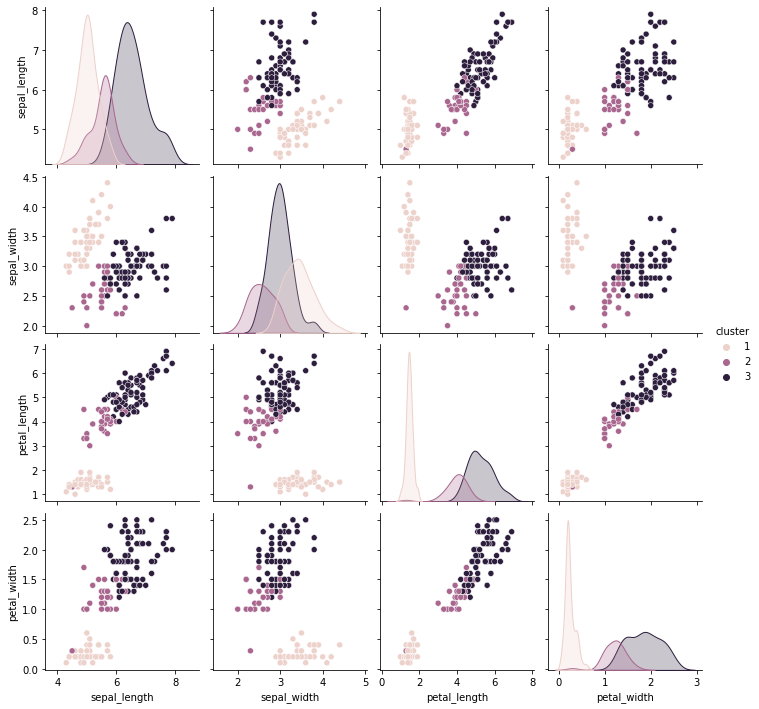

In [57]:
hc_result_df = pd.concat([X, pd.DataFrame({'cluster': clusters})], axis=1)
sns.pairplot(hc_result_df, hue='cluster')